<a href="https://colab.research.google.com/github/Shadhin282/Machine-learning-problem-Solving/blob/main/Project_Classifying_the_credit_scores_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#First of all import some common python libraries which is necessary to continue the program


In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

#below import the dataset and explore the data set


In [2]:
df = pd.read_csv("/content/drive/MyDrive/Data Set/Bank Data.csv") #import csv file

In [3]:
df.head() #check the top 5 data rows of total rows and few columns

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,0x160a,CUS_0xd40,September,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,2022.0,Good,809.98,35.030402,22 Years and 9 Months,No,49.574949,236.64268203272135,Low_spent_Small_value_payments,186.26670208571772
1,0x160b,CUS_0xd40,October,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,33.053114,22 Years and 10 Months,No,49.574949,21.465380264657146,High_spent_Medium_value_payments,361.44400385378196
2,0x160c,CUS_0xd40,November,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,33.811894,NaN,No,49.574949,148.23393788500925,Low_spent_Medium_value_payments,264.67544623342997
3,0x160d,CUS_0xd40,December,Aaron Maashoh,24_,821-00-0265,Scientist,19114.12,NaN,3,...,4.0,Good,809.98,32.430559,23 Years and 0 Months,No,49.574949,39.08251089460281,High_spent_Medium_value_payments,343.82687322383634
4,0x1616,CUS_0x21b1,September,Rick Rothackerj,28,004-07-5839,_______,34847.84,3037.986667,2,...,5.0,Good,605.03,25.926822,27 Years and 3 Months,No,18.816215,39.684018417945296,High_spent_Large_value_payments,485.2984336755923


In [4]:
df.info() #check the all the columns and data types.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        50000 non-null  object 
 1   Customer_ID               50000 non-null  object 
 2   Month                     50000 non-null  object 
 3   Name                      44985 non-null  object 
 4   Age                       50000 non-null  object 
 5   SSN                       50000 non-null  object 
 6   Occupation                50000 non-null  object 
 7   Annual_Income             50000 non-null  object 
 8   Monthly_Inhand_Salary     42502 non-null  float64
 9   Num_Bank_Accounts         50000 non-null  int64  
 10  Num_Credit_Card           50000 non-null  int64  
 11  Interest_Rate             50000 non-null  int64  
 12  Num_of_Loan               50000 non-null  object 
 13  Type_of_Loan              44296 non-null  object 
 14  Delay_

In [5]:
df.describe() #here we get a summary of these dataset like count, mean, standard deviation, minimum values , maximum values , Q1 = 25%, Q2 = 50%, Q3 = 75%.


,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,42502.000000,50000.000000,50000.000000,50000.000000,50000.000000,48965.000000,50000.000000,50000.000000
mean,4182.004291,16.838260,22.921480,68.772640,21.052640,30.080200,32.279581,1491.304305
std,3174.109304,116.396848,129.314804,451.602363,14.860397,196.984121,5.106238,8595.647887
min,303.645417,-1.000000,0.000000,1.000000,-5.000000,0.000000,20.509652,0.000000
25%,1625.188333,3.000000,4.000000,8.000000,10.000000,4.000000,28.061040,32.222388
50%,3086.305000,6.000000,5.000000,13.000000,18.000000,7.000000,32.280390,74.733349
75%,5934.189094,7.000000,7.000000,20.000000,28.000000,10.000000,36.468591,176.157491
max,15204.633333,1798.000000,1499.000000,5799.000000,67.000000,2593.000000,48.540663,82398.000000


#Check the missing value and handling

In [6]:
# check the missing values
features_with_na=[features for features in df.columns if df[features].isnull().sum()>1]
## 2- step print the feature name and the percentage of missing values

for feature in features_with_na:
    print(feature, np.round(df[feature].isnull().mean(), 4),  ' % missing values')

Name 0.1003  % missing values
Monthly_Inhand_Salary 0.15  % missing values
Type_of_Loan 0.1141  % missing values
Num_of_Delayed_Payment 0.07  % missing values
Num_Credit_Inquiries 0.0207  % missing values
Credit_History_Age 0.0894  % missing values
Amount_invested_monthly 0.0454  % missing values
Monthly_Balance 0.0112  % missing values


In [7]:
df.isnull().sum()

,0
ID,0
Customer_ID,0
Month,0
Name,5015
Age,0
SSN,0
Occupation,0
Annual_Income,0
Monthly_Inhand_Salary,7498
Num_Bank_Accounts,0


In [8]:
df.shape

(50000, 27)

#Separate target outcome

In [9]:
y = df['Credit_Mix'] # separate Target feature.
y.head()

,Credit_Mix
0,Good
1,Good
2,Good
3,Good
4,Good


#Separate independent features

In [10]:
x = df.drop(['Credit_Mix'], axis=1) # drop target features and keeping all independent features.
x.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,0x160a,CUS_0xd40,September,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,11.27,2022.0,809.98,35.030402,22 Years and 9 Months,No,49.574949,236.64268203272135,Low_spent_Small_value_payments,186.26670208571772
1,0x160b,CUS_0xd40,October,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,13.27,4.0,809.98,33.053114,22 Years and 10 Months,No,49.574949,21.465380264657146,High_spent_Medium_value_payments,361.44400385378196
2,0x160c,CUS_0xd40,November,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,12.27,4.0,809.98,33.811894,NaN,No,49.574949,148.23393788500925,Low_spent_Medium_value_payments,264.67544623342997
3,0x160d,CUS_0xd40,December,Aaron Maashoh,24_,821-00-0265,Scientist,19114.12,NaN,3,...,11.27,4.0,809.98,32.430559,23 Years and 0 Months,No,49.574949,39.08251089460281,High_spent_Medium_value_payments,343.82687322383634
4,0x1616,CUS_0x21b1,September,Rick Rothackerj,28,004-07-5839,_______,34847.84,3037.986667,2,...,5.42,5.0,605.03,25.926822,27 Years and 3 Months,No,18.816215,39.684018417945296,High_spent_Large_value_payments,485.2984336755923


In [11]:
# list of numerical variables
numerical_features = [feature for feature in x.columns if x[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
x[numerical_features].head()

Number of numerical variables:  8


,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
0,1824.843333,3,4,3,3,2022.0,35.030402,49.574949
1,1824.843333,3,4,3,3,4.0,33.053114,49.574949
2,1824.843333,3,4,3,-1,4.0,33.811894,49.574949
3,NaN,3,4,3,4,4.0,32.430559,49.574949
4,3037.986667,2,4,6,3,5.0,25.926822,18.816215


#Here below finding outliers and remove outliers

In [12]:
x[numerical_features].mean() #finding mean of the features

,0
Monthly_Inhand_Salary,4182.004291
Num_Bank_Accounts,16.838260
Num_Credit_Card,22.921480
Interest_Rate,68.772640
Delay_from_due_date,21.052640
Num_Credit_Inquiries,30.080200
Credit_Utilization_Ratio,32.279581
Total_EMI_per_month,1491.304305


In [14]:
x[numerical_features].median() # finding median of the features

,0
Monthly_Inhand_Salary,3086.305000
Num_Bank_Accounts,6.000000
Num_Credit_Card,5.000000
Interest_Rate,13.000000
Delay_from_due_date,18.000000
Num_Credit_Inquiries,7.000000
Credit_Utilization_Ratio,32.280390
Total_EMI_per_month,74.733349


In [15]:
x[numerical_features].mode()

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
0,1315.560833,6.0,5.0,8.0,13.0,5.0,20.509652,0.0
1,NaN,NaN,NaN,NaN,NaN,NaN,20.620017,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,20.739225,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,20.800587,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,20.839226,NaN
...,...,...,...,...,...,...,...,...
49995,NaN,NaN,NaN,NaN,NaN,NaN,48.065281,NaN
49996,NaN,NaN,NaN,NaN,NaN,NaN,48.096457,NaN
49997,NaN,NaN,NaN,NaN,NaN,NaN,48.152777,NaN
49998,NaN,NaN,NaN,NaN,NaN,NaN,48.228714,NaN


In [16]:
x[numerical_features].std()

,0
Monthly_Inhand_Salary,3174.109304
Num_Bank_Accounts,116.396848
Num_Credit_Card,129.314804
Interest_Rate,451.602363
Delay_from_due_date,14.860397
Num_Credit_Inquiries,196.984121
Credit_Utilization_Ratio,5.106238
Total_EMI_per_month,8595.647887


In [17]:
x[numerical_features].var() # finding the variance of the features

,0
Monthly_Inhand_Salary,1.007497e+07
Num_Bank_Accounts,1.354823e+04
Num_Credit_Card,1.672232e+04
Interest_Rate,2.039447e+05
Delay_from_due_date,2.208314e+02
Num_Credit_Inquiries,3.880274e+04
Credit_Utilization_Ratio,2.607366e+01
Total_EMI_per_month,7.388516e+07


In [18]:
max_z = x[numerical_features].max() # finding the maximum value of the features
min_z = x[numerical_features].min() # finding the minimum value of the features

In [19]:
max_z

,0
Monthly_Inhand_Salary,15204.633333
Num_Bank_Accounts,1798.000000
Num_Credit_Card,1499.000000
Interest_Rate,5799.000000
Delay_from_due_date,67.000000
Num_Credit_Inquiries,2593.000000
Credit_Utilization_Ratio,48.540663
Total_EMI_per_month,82398.000000


In [20]:
min_z

,0
Monthly_Inhand_Salary,303.645417
Num_Bank_Accounts,-1.000000
Num_Credit_Card,0.000000
Interest_Rate,1.000000
Delay_from_due_date,-5.000000
Num_Credit_Inquiries,0.000000
Credit_Utilization_Ratio,20.509652
Total_EMI_per_month,0.000000


In [21]:
x[numerical_features].shape

(50000, 8)

In [22]:
df2 = x[numerical_features].copy()
df3 = x[numerical_features].copy()
df4 = x[numerical_features].copy()

In [23]:
Q1 = x[numerical_features].quantile(0.25)
Q3 = x[numerical_features].quantile(0.75)
Q1 ,Q3

(Monthly_Inhand_Salary       1625.188333
 Num_Bank_Accounts              3.000000
 Num_Credit_Card                4.000000
 Interest_Rate                  8.000000
 Delay_from_due_date           10.000000
 Num_Credit_Inquiries           4.000000
 Credit_Utilization_Ratio      28.061040
 Total_EMI_per_month           32.222388
 Name: 0.25, dtype: float64,
 Monthly_Inhand_Salary       5934.189094
 Num_Bank_Accounts              7.000000
 Num_Credit_Card                7.000000
 Interest_Rate                 20.000000
 Delay_from_due_date           28.000000
 Num_Credit_Inquiries          10.000000
 Credit_Utilization_Ratio      36.468591
 Total_EMI_per_month          176.157491
 Name: 0.75, dtype: float64)

In [24]:
IQR = Q3 - Q1
IQR

,0
Monthly_Inhand_Salary,4309.000760
Num_Bank_Accounts,4.000000
Num_Credit_Card,3.000000
Interest_Rate,12.000000
Delay_from_due_date,18.000000
Num_Credit_Inquiries,6.000000
Credit_Utilization_Ratio,8.407551
Total_EMI_per_month,143.935104


In [25]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit # these are the outliers

(Monthly_Inhand_Salary      -4838.312807
 Num_Bank_Accounts             -3.000000
 Num_Credit_Card               -0.500000
 Interest_Rate                -10.000000
 Delay_from_due_date          -17.000000
 Num_Credit_Inquiries          -5.000000
 Credit_Utilization_Ratio      15.449714
 Total_EMI_per_month         -183.680268
 dtype: float64,
 Monthly_Inhand_Salary       12397.690234
 Num_Bank_Accounts              13.000000
 Num_Credit_Card                11.500000
 Interest_Rate                  38.000000
 Delay_from_due_date            55.000000
 Num_Credit_Inquiries           19.000000
 Credit_Utilization_Ratio       49.079917
 Total_EMI_per_month           392.060147
 dtype: float64)

In [26]:
x[numerical_features][(x[numerical_features]<lower_limit)|(x[numerical_features]>upper_limit)] # here has highlighted the outliers

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
0,NaN,NaN,NaN,NaN,NaN,2022.0,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
49995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
x[numerical_features] = x[numerical_features][(x[numerical_features]>lower_limit)&(x[numerical_features]<upper_limit)]
x[numerical_features]#remove outliers

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
0,1824.843333,3.0,4.0,3.0,3.0,NaN,35.030402,49.574949
1,1824.843333,3.0,4.0,3.0,3.0,4.0,33.053114,49.574949
2,1824.843333,3.0,4.0,3.0,-1.0,4.0,33.811894,49.574949
3,NaN,3.0,4.0,3.0,4.0,4.0,32.430559,49.574949
4,3037.986667,2.0,4.0,6.0,3.0,5.0,25.926822,18.816215
...,...,...,...,...,...,...,...,...
49995,1929.906667,10.0,8.0,29.0,33.0,12.0,34.780553,60.964772
49996,NaN,4.0,6.0,7.0,20.0,7.0,27.758522,35.104023
49997,3359.415833,4.0,6.0,7.0,23.0,7.0,36.858542,35.104023
49998,NaN,4.0,6.0,7.0,21.0,7.0,39.139840,35.104023


In [28]:
# List of categorical features
categorical_features=[feature for feature in x.columns if x[feature].dtypes=='O']
categorical_features

['ID',
 'Customer_ID',
 'Month',
 'Name',
 'Age',
 'SSN',
 'Occupation',
 'Annual_Income',
 'Num_of_Loan',
 'Type_of_Loan',
 'Num_of_Delayed_Payment',
 'Changed_Credit_Limit',
 'Outstanding_Debt',
 'Credit_History_Age',
 'Payment_of_Min_Amount',
 'Amount_invested_monthly',
 'Payment_Behaviour',
 'Monthly_Balance']

In [29]:
len(categorical_features)

18

In [30]:
x[categorical_features].head() # showing categorical feature separately

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Num_of_Loan,Type_of_Loan,Num_of_Delayed_Payment,Changed_Credit_Limit,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,0x160a,CUS_0xd40,September,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",7,11.27,809.98,22 Years and 9 Months,No,236.64268203272135,Low_spent_Small_value_payments,186.26670208571772
1,0x160b,CUS_0xd40,October,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",9,13.27,809.98,22 Years and 10 Months,No,21.465380264657146,High_spent_Medium_value_payments,361.44400385378196
2,0x160c,CUS_0xd40,November,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",4,12.27,809.98,NaN,No,148.23393788500925,Low_spent_Medium_value_payments,264.67544623342997
3,0x160d,CUS_0xd40,December,Aaron Maashoh,24_,821-00-0265,Scientist,19114.12,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,11.27,809.98,23 Years and 0 Months,No,39.08251089460281,High_spent_Medium_value_payments,343.82687322383634
4,0x1616,CUS_0x21b1,September,Rick Rothackerj,28,004-07-5839,_______,34847.84,1,Credit-Builder Loan,1,5.42,605.03,27 Years and 3 Months,No,39.684018417945296,High_spent_Large_value_payments,485.2984336755923


In [31]:
#checking the number categories in the categorical features
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(x[feature].unique())))

The feature is ID and number of categories are 50000
The feature is Customer_ID and number of categories are 12500
The feature is Month and number of categories are 4
The feature is Name and number of categories are 10140
The feature is Age and number of categories are 976
The feature is SSN and number of categories are 12501
The feature is Occupation and number of categories are 16
The feature is Annual_Income and number of categories are 16121
The feature is Num_of_Loan and number of categories are 263
The feature is Type_of_Loan and number of categories are 6261
The feature is Num_of_Delayed_Payment and number of categories are 444
The feature is Changed_Credit_Limit and number of categories are 3927
The feature is Outstanding_Debt and number of categories are 12685
The feature is Credit_History_Age and number of categories are 400
The feature is Payment_of_Min_Amount and number of categories are 3
The feature is Amount_invested_monthly and number of categories are 45451
The feature

In [32]:
# here checking null values in categorical features
x[categorical_features].isnull().sum()

,0
ID,0
Customer_ID,0
Month,0
Name,5015
Age,0
SSN,0
Occupation,0
Annual_Income,0
Num_of_Loan,0
Type_of_Loan,5704


In [33]:
# here checking which categorical features have missing values
features_nan=[feature for feature in x.columns if x[feature].isnull().sum()>1 and x[feature].dtypes=='O']

for feature in features_nan:
    print("{}: {}% missing values".format(feature,np.round(x[feature].isnull().mean(),4)))

Name: 0.1003% missing values
Type_of_Loan: 0.1141% missing values
Num_of_Delayed_Payment: 0.07% missing values
Credit_History_Age: 0.0894% missing values
Amount_invested_monthly: 0.0454% missing values
Monthly_Balance: 0.0112% missing values


In [34]:
#  handling missing values
def replace_cat_feature(x,features_nan):
    data=x.copy()
    data[features_nan]=data[features_nan].fillna('Missing')
    return data

x=replace_cat_feature(x,features_nan)

x[features_nan].isnull().sum()

,0
Name,0
Type_of_Loan,0
Num_of_Delayed_Payment,0
Credit_History_Age,0
Amount_invested_monthly,0
Monthly_Balance,0


In [35]:
x.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,0x160a,CUS_0xd40,September,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3.0,...,11.27,NaN,809.98,35.030402,22 Years and 9 Months,No,49.574949,236.64268203272135,Low_spent_Small_value_payments,186.26670208571772
1,0x160b,CUS_0xd40,October,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3.0,...,13.27,4.0,809.98,33.053114,22 Years and 10 Months,No,49.574949,21.465380264657146,High_spent_Medium_value_payments,361.44400385378196
2,0x160c,CUS_0xd40,November,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3.0,...,12.27,4.0,809.98,33.811894,Missing,No,49.574949,148.23393788500925,Low_spent_Medium_value_payments,264.67544623342997
3,0x160d,CUS_0xd40,December,Aaron Maashoh,24_,821-00-0265,Scientist,19114.12,NaN,3.0,...,11.27,4.0,809.98,32.430559,23 Years and 0 Months,No,49.574949,39.08251089460281,High_spent_Medium_value_payments,343.82687322383634
4,0x1616,CUS_0x21b1,September,Rick Rothackerj,28,004-07-5839,_______,34847.84,3037.986667,2.0,...,5.42,5.0,605.03,25.926822,27 Years and 3 Months,No,18.816215,39.684018417945296,High_spent_Large_value_payments,485.2984336755923


In [36]:
x.isnull().sum()

,0
ID,0
Customer_ID,0
Month,0
Name,0
Age,0
SSN,0
Occupation,0
Annual_Income,0
Monthly_Inhand_Salary,8353
Num_Bank_Accounts,635


In [37]:
## Now lets check for numerical variables the contains missing values
numerical_with_nan=[feature for feature in x.columns if x[feature].isnull().sum() and x[feature].dtypes!='O']

## We will print the numerical nan variables and percentage of missing values

for feature in numerical_with_nan:
    print("{}: {}% missing value".format(feature,np.around(x[feature].isnull().mean(),4)))

Monthly_Inhand_Salary: 0.1671% missing value
Num_Bank_Accounts: 0.0127% missing value
Num_Credit_Card: 0.0236% missing value
Interest_Rate: 0.0193% missing value
Delay_from_due_date: 0.0458% missing value
Num_Credit_Inquiries: 0.0376% missing value
Total_EMI_per_month: 0.0787% missing value


In [38]:
for feature in numerical_with_nan:
    ## We will replace by using median since there are outliers
    median_value=x[feature].median()

    ## create a new feature to capture nan values
    x[feature+'nan']=np.where(x[feature].isnull(),1,0)
    x[feature].fillna(median_value,inplace=True)

x[numerical_with_nan].isnull().sum()

,0
Monthly_Inhand_Salary,0
Num_Bank_Accounts,0
Num_Credit_Card,0
Interest_Rate,0
Delay_from_due_date,0
Num_Credit_Inquiries,0
Total_EMI_per_month,0


In [39]:
x.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Monthly_Inhand_Salarynan,Num_Bank_Accountsnan,Num_Credit_Cardnan,Interest_Ratenan,Delay_from_due_datenan,Num_Credit_Inquiriesnan,Total_EMI_per_monthnan
0,0x160a,CUS_0xd40,September,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3.0,...,236.64268203272135,Low_spent_Small_value_payments,186.26670208571772,0,0,0,0,0,1,0
1,0x160b,CUS_0xd40,October,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3.0,...,21.465380264657146,High_spent_Medium_value_payments,361.44400385378196,0,0,0,0,0,0,0
2,0x160c,CUS_0xd40,November,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3.0,...,148.23393788500925,Low_spent_Medium_value_payments,264.67544623342997,0,0,0,0,0,0,0
3,0x160d,CUS_0xd40,December,Aaron Maashoh,24_,821-00-0265,Scientist,19114.12,3031.493333,3.0,...,39.08251089460281,High_spent_Medium_value_payments,343.82687322383634,1,0,0,0,0,0,0
4,0x1616,CUS_0x21b1,September,Rick Rothackerj,28,004-07-5839,_______,34847.84,3037.986667,2.0,...,39.684018417945296,High_spent_Large_value_payments,485.2984336755923,0,0,0,0,0,0,0


In [40]:
categorical_features=[feature for feature in x.columns if x[feature].dtype=='O']
categorical_features # showing separately catergorical features

['ID',
 'Customer_ID',
 'Month',
 'Name',
 'Age',
 'SSN',
 'Occupation',
 'Annual_Income',
 'Num_of_Loan',
 'Type_of_Loan',
 'Num_of_Delayed_Payment',
 'Changed_Credit_Limit',
 'Outstanding_Debt',
 'Credit_History_Age',
 'Payment_of_Min_Amount',
 'Amount_invested_monthly',
 'Payment_Behaviour',
 'Monthly_Balance']

#Here we are encoding categorical features

In [41]:

for feature in categorical_features:
    labels_ordered=x.groupby([feature])['Num_Credit_Card'].mean().sort_values().index
    labels_ordered={k:i for i,k in enumerate(labels_ordered,0)}
    x[feature]=x[feature].map(labels_ordered)

In [42]:
x.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Monthly_Inhand_Salarynan,Num_Bank_Accountsnan,Num_Credit_Cardnan,Interest_Ratenan,Delay_from_due_datenan,Num_Credit_Inquiriesnan,Total_EMI_per_monthnan
0,12356,3698,0,2301,545,3529,5,2972,1824.843333,3.0,...,11104,6,13456,0,0,0,0,0,1,0
1,12320,3698,3,2301,530,3529,5,2972,1824.843333,3.0,...,8890,1,15484,0,0,0,0,0,0,0
2,12279,3698,2,2301,530,3529,5,2972,1824.843333,3.0,...,13753,4,14420,0,0,0,0,0,0,0
3,12276,3698,1,2301,535,3529,5,2972,3031.493333,3.0,...,9326,1,15248,1,0,0,0,0,0,0
4,12318,2966,0,2170,505,3422,6,3796,3037.986667,2.0,...,9322,0,10446,0,0,0,0,0,0,0


In [43]:
x.info() # make all features in int or float data type.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        50000 non-null  int64  
 1   Customer_ID               50000 non-null  int64  
 2   Month                     50000 non-null  int64  
 3   Name                      50000 non-null  int64  
 4   Age                       50000 non-null  int64  
 5   SSN                       50000 non-null  int64  
 6   Occupation                50000 non-null  int64  
 7   Annual_Income             50000 non-null  int64  
 8   Monthly_Inhand_Salary     50000 non-null  float64
 9   Num_Bank_Accounts         50000 non-null  float64
 10  Num_Credit_Card           50000 non-null  float64
 11  Interest_Rate             50000 non-null  float64
 12  Num_of_Loan               50000 non-null  int64  
 13  Type_of_Loan              50000 non-null  int64  
 14  Delay_

In [44]:
x.shape

(50000, 33)

### Scaling the features

In [45]:
feature_scale=[feature for feature in x.columns]

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()


In [46]:
scaler.fit(x)

MinMaxScaler()

In [47]:
scaler.transform(x)

array([[0.24712494, 0.29586367, 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.24640493, 0.29586367, 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.24558491, 0.29586367, 0.66666667, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.52781056, 0.58396672, 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.52783056, 0.58396672, 0.66666667, ..., 0.        , 0.        ,
        0.        ],
       [0.52803056, 0.58396672, 0.33333333, ..., 0.        , 0.        ,
        0.        ]])

In [48]:
x = pd.concat( [pd.DataFrame(scaler.transform(x), columns=feature_scale)],
                    axis=1
                   ) # after scalling adjust the features header with values.

In [49]:
x.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Monthly_Inhand_Salarynan,Num_Bank_Accountsnan,Num_Credit_Cardnan,Interest_Ratenan,Delay_from_due_datenan,Num_Credit_Inquiriesnan,Total_EMI_per_monthnan
0,0.247125,0.295864,0.000000,0.226945,0.558974,0.28232,0.333333,0.184367,0.125808,0.333333,...,0.244312,1.000000,0.272207,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.246405,0.295864,1.000000,0.226945,0.543590,0.28232,0.333333,0.184367,0.125808,0.333333,...,0.195600,0.166667,0.313232,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.245585,0.295864,0.666667,0.226945,0.543590,0.28232,0.333333,0.184367,0.125808,0.333333,...,0.302596,0.666667,0.291708,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.245525,0.295864,0.333333,0.226945,0.548718,0.28232,0.333333,0.184367,0.225602,0.333333,...,0.205193,0.166667,0.308458,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.246365,0.237299,0.000000,0.214025,0.517949,0.27376,0.400000,0.235484,0.226139,0.250000,...,0.205105,0.000000,0.211316,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<Axes: xlabel='Credit_Mix', ylabel='Count'>

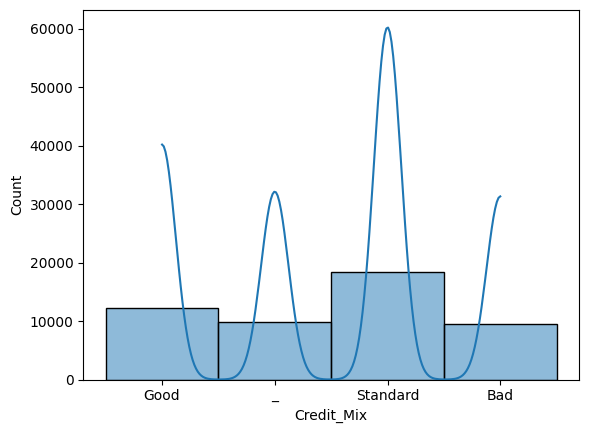

In [50]:
sns.histplot(y, kde=True) #show the distribution of target features

# Spliting the data set in training and testing

In [51]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3, random_state=42)

In [52]:
xtrain.shape

(35000, 33)

In [53]:
ytrain.shape

(35000,)

#importing three model to train and check the performance

####First improting Random Forest Classifier Alogorithms

In [54]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score , classification_report

In [55]:
model_rf = RandomForestClassifier(n_estimators=200 ,max_depth=10, random_state=0)

In [56]:
model_rfc = model_rf.fit(xtrain,ytrain)

In [57]:
ypred_rf = model_rfc.predict(xtest)


In [58]:
ypred = model_rf.predict(xtrain)

In [59]:
score_rf = accuracy_score(ypred,ytrain)
score_rf

0.7606285714285714

In [60]:
score_rfc = accuracy_score(ypred_rf,ytest)
score_rfc

0.7480666666666667

In [61]:
print(classification_report(ypred,ytrain))

              precision    recall  f1-score   support

         Bad       0.98      0.74      0.85      8741
        Good       0.94      0.77      0.85     10520
    Standard       0.93      0.76      0.84     15714
           _       0.00      1.00      0.01        25

    accuracy                           0.76     35000
   macro avg       0.71      0.82      0.63     35000
weighted avg       0.95      0.76      0.84     35000



In [62]:
print(classification_report(ypred_rf,ytest))

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

         Bad       0.96      0.73      0.83      3813
        Good       0.94      0.76      0.84      4544
    Standard       0.91      0.75      0.82      6643
           _       0.00      0.00      0.00         0

    accuracy                           0.75     15000
   macro avg       0.70      0.56      0.62     15000
weighted avg       0.93      0.75      0.83     15000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


#### Second importing Gradient Boosting Classifer

In [63]:
from sklearn.ensemble import GradientBoostingClassifier

In [64]:
gbr = GradientBoostingClassifier()

In [65]:
gbr_r = gbr.fit(xtrain, ytrain)

In [66]:
ypred_gb = gbr_r.predict(xtest)

In [67]:
ypred_gbc = gbr_r.predict(xtrain)

In [68]:
score_gbc = accuracy_score(ypred_gbc,ytrain)
score_gbc

0.7500857142857142

In [69]:
score_gb = accuracy_score(ypred_gb,ytest)
score_gb

0.7402

In [70]:
print(classification_report(ypred_gb,ytest))

              precision    recall  f1-score   support

         Bad       0.93      0.74      0.82      3674
        Good       0.94      0.75      0.83      4606
    Standard       0.90      0.74      0.81      6678
           _       0.00      0.26      0.01        42

    accuracy                           0.74     15000
   macro avg       0.69      0.62      0.62     15000
weighted avg       0.92      0.74      0.82     15000



#### Third importing Logistic Regression

In [71]:
from sklearn.linear_model import LogisticRegression

In [72]:
lr_model = LogisticRegression(max_iter=1000, penalty='l2')
lr_model = lr_model.fit(xtrain, ytrain)

In [73]:
ypred_lr = lr_model.predict(xtest)

In [74]:
ypred_lrc = lr_model.predict(xtrain)

In [75]:
score_lrc = accuracy_score(ypred_lrc,ytrain)
score_lrc

0.7047714285714286

In [76]:
score_lf = accuracy_score(ypred_lr,ytest)
score_lf

0.698

In [77]:
print(classification_report(ypred_lr,ytest))

              precision    recall  f1-score   support

         Bad       0.87      0.73      0.80      3457
        Good       0.90      0.73      0.81      4548
    Standard       0.82      0.71      0.76      6354
           _       0.04      0.17      0.06       641

    accuracy                           0.70     15000
   macro avg       0.66      0.59      0.61     15000
weighted avg       0.83      0.70      0.75     15000



# Here we are comparing and visualizing these models performance which one is giving good results.

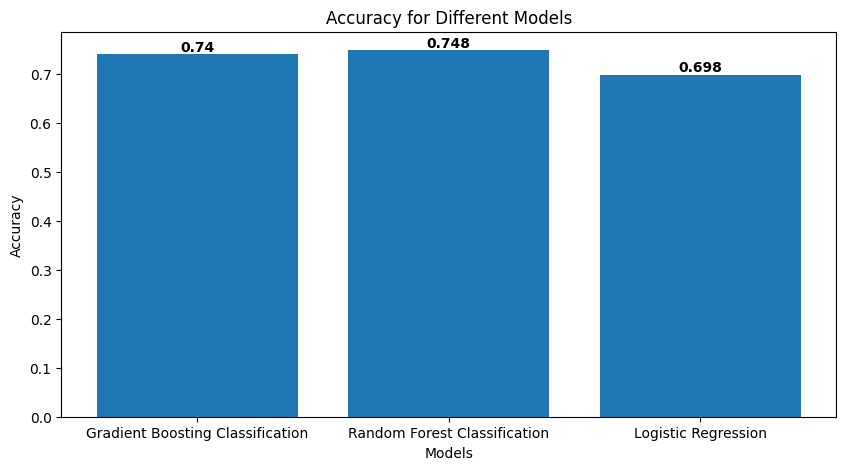

In [78]:
def plot_histogram(metric_values, model_names, metric_name):
    fig, ax = plt.subplots(figsize=(10, 5))
    bars = plt.bar(model_names, metric_values)
    plt.xlabel('Models')
    plt.ylabel(metric_name)
    plt.title(f'{metric_name} for Different Models')

    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 3), ha='center', va='bottom', color='black', fontweight='bold')
    plt.show()

accuracy_values = [score_gb, score_rfc, score_lf]
model_names = ['Gradient Boosting Classification', 'Random Forest Classification', 'Logistic Regression']
plot_histogram(accuracy_values, model_names, 'Accuracy')

### Another model also import Support Vector Machine Learning

In [79]:
from sklearn.svm import SVC

In [80]:
svm = SVC(kernel='poly', random_state=0)
svm.fit(xtrain, ytrain)

SVC(kernel='poly', random_state=0)

In [81]:
svm.score(xtrain, ytrain)

0.7430857142857142

In [82]:
accuracy_score(svm.predict(xtest), ytest)

0.7268

#### Here we are doing Hyperparamter tuning and check best parameter to get maximum performance

In [83]:
lr_params = {
    'n_estimators' : [101,151,201,251,301],
    #'criterion' : ['gini', 'entropy'],
    'max_depth' : [5,6,15,20,30,35,40],
    'min_samples_split' : [4,6,8,10,12],
    'min_samples_leaf' : [2,3,4,5,6],
    #'max_features' : ['auto', 'sqrt', 'log2']
}

In [84]:
from sklearn.model_selection import RandomizedSearchCV

In [85]:
rf_randomizedsearchcv = RandomizedSearchCV(estimator=RandomForestClassifier(random_state=42),
                                           param_distributions=lr_params,
                                           n_iter= 10, cv=2, random_state=42)

In [86]:
rf_random = rf_randomizedsearchcv.fit(xtrain, ytrain)

In [87]:
rf_random.cv_results_

{'mean_fit_time': array([16.37862194, 20.00855589, 16.57728422,  7.92019463, 15.25317407,
        13.06924093, 12.22399914,  5.05912852,  8.02387977, 24.94127882]),
 'std_fit_time': array([0.29826152, 0.42376399, 0.73555601, 0.54224372, 0.05523515,
        0.0188967 , 0.04987156, 0.41120911, 0.43582869, 0.3165983 ]),
 'mean_score_time': array([0.90170956, 0.95952535, 0.71002662, 0.46149051, 0.7425344 ,
        0.657426  , 0.55770421, 0.22169375, 0.42202985, 1.39570343]),
 'std_score_time': array([0.19582462, 0.18168855, 0.01039302, 0.08242881, 0.09575534,
        0.09243548, 0.00539041, 0.05375648, 0.04565132, 0.24994767]),
 'param_n_estimators': masked_array(data=[201, 301, 201, 101, 201, 201, 151, 151, 101, 301],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value=999999),
 'param_min_samples_split': masked_array(data=[12, 10, 6, 10, 12, 4, 6, 8, 8, 4],
              mask=[False, False, False, False, False,

In [88]:
rf_random.best_params_

{'n_estimators': 201,
 'min_samples_split': 6,
 'min_samples_leaf': 2,
 'max_depth': 20}

In [89]:
model_rf2 = RandomForestClassifier(n_estimators=301 ,max_depth=40, min_samples_split = 4, min_samples_leaf=3,random_state=0)

In [90]:
model_rfc2 = model_rf.fit(xtrain,ytrain)

In [91]:
ypred_rf2 = model_rfc.predict(xtest)

In [92]:
score_rfc2 = accuracy_score(ypred_rf,ytest)
score_rfc

0.7480666666666667

In [93]:
print(classification_report(ypred_rf2,ytest))

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

         Bad       0.96      0.73      0.83      3813
        Good       0.94      0.76      0.84      4544
    Standard       0.91      0.75      0.82      6643
           _       0.00      0.00      0.00         0

    accuracy                           0.75     15000
   macro avg       0.70      0.56      0.62     15000
weighted avg       0.93      0.75      0.83     15000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


##Here we get maximum score by using Random Forest Regression model which is 74.8% accurate results will be provided.
# i belive that in this model i need to improve my knowledge and skill more to increase accuarcy score. i will improve my skill more in future